 ### Regularized Regression
 
#### LASSO:
       -LASSO stands for Least Absolute Shrinkage and Selection Operator. It performs L1 regularization and penalizes large weights by adding their absolute value of magnitude to the cost function. The mathematical representation of cost function for L1 regularization is
       
$$ Cost(B) = |y- XB|^2 + \lambda|B|_1 $$

$$Where $$

$$\lambda|B|_1  = \sum^{p}_{j=1}|B_j|$$



#### Ridge Regression



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import california_housing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/Matt/Documents/Intro To Stat Learning/MachineLearningFromScratch/data/Advertising.csv')
#df = data[['Income','Rating','Balance']]


data.drop('Unnamed: 0', axis=1, inplace=True)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [7]:
y = data['sales']
X = data.iloc[:,:-1]
standsc = StandardScaler()
standsc.fit(X)
X_norm = pd.DataFrame(standsc.transform(X))
X_norm.columns = X.columns

In [37]:
def addConstantFunc(X):

    x0 = np.ones(len(X))

    #add a constant
    X['constant'] = x0

    return X


def calculate_cost_function(X,y, coefficients):



    #add a constant
    m = len(y)
    predictions = X.dot(coefficients)

    square_err = (predictions - y) **2
    rmse = 1/(2*m) * np.sum(square_err)
    return rmse


def RegularizedRegression(X,y, alpha, n_iterations, LAMBDA, R_type):

    """
    if step loss is true, the function returns the gradient descent output


    """
    if R_type == 'L2':
        X_ = addConstantFunc(X)

        gradient_preds = []

        #create base intercept
        coefficients = np.array(np.zeros(X_.shape[1]))

        cost_history = [0] * n_iterations

        for i in range(n_iterations):

            h = X_.dot(coefficients)

            loss = h - y

            gradient = (X_.T.dot(loss)/ len(y)) +  LAMBDA*2*coefficients

            coefficients = coefficients - (alpha *gradient)

            cost = calculate_cost_function(X_,y, coefficients)

            cost_history[i] = cost
        return coefficients
    
    
    elif R_type == "L1":
        
        X_ = addConstantFunc(X)

        gradient_preds = []

        #create base intercept
        coefficients = np.array(np.zeros(X_.shape[1]))

        cost_history = [0] * n_iterations

        for i in range(n_iterations):

            h = X_.dot(coefficients)

            loss = h - y

            gradient = (X_.T.dot(loss)/ len(y)) +  LAMBDA*np.sign(coefficients)


            coefficients = coefficients - alpha *gradient 
            cost = calculate_cost_function(X_,y, coefficients)

            cost_history[i] = cost
        return coefficients
    
    elif R_type == "L1_L2":
        
        
        X_ = addConstantFunc(X)

        gradient_preds = []

        #create base intercept
        coefficients = np.array(np.zeros(X_.shape[1]))

        cost_history = [0] * n_iterations

        for i in range(n_iterations):

            h = X_.dot(coefficients)

            loss = h - y

            gradient = (X_.T.dot(loss)/ len(y)) +  LAMBDA*np.sign(coefficients) +  Lambda*2*coefficients

            coefficients = coefficients - (alpha *gradient)

            cost = calculate_cost_function(X_,y, coefficients)

            cost_history[i] = cost
        return coefficients



  
    


def predict(X, coefficients, y):

    X = addConstantFunc(X)
    prediction = X.dot(coefficients)
    
    prediction = pd.DataFrame({'Prediction':prediction, 'Actual':y})
    return prediction



In [38]:
theta_l1 = RegularizedRegression(X_norm,y,0.001,100,.7,R_type='L1')

In [23]:
theta_l2 = RegularizedRegression(X_norm,y,0.001,1000,.7,R_type='L2')

In [32]:
theta_normal = RegularizedRegression(X_norm,y,0.001,1000,0,R_type='L2')

In [40]:
theta_l1

TV           0.320872
radio        0.217877
newspaper    0.042444
constant     1.269041
dtype: float64

In [36]:
theta_l1

TV           66.047811
radio        65.007558
newspaper    64.826216
constant     67.346561
dtype: float64

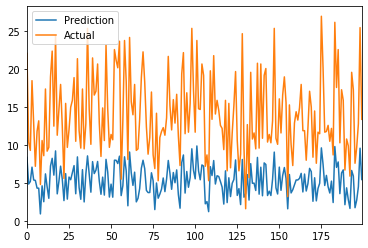

In [30]:
predict(X_norm,theta_l2,y).plot()

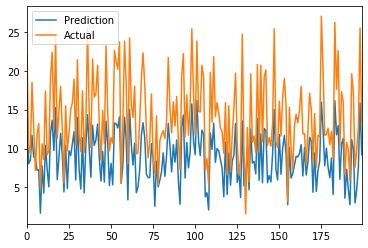

In [33]:
predict(X_norm,theta_normal,y).plot()